## Part of Speech Tagging

In [ ]:
!pip install nltk

In [2]:
from nltk import word_tokenize, pos_tag

In [5]:
print(pos_tag(word_tokenize("India Japan China is a great country")))

[('India', 'NNP'), ('Japan', 'NNP'), ('China', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('country', 'NN')]


In [6]:
# To view all possible POS tags for NLTK lib
import nltk
nltk.help.upenn_tagset()

In [21]:
# Application of {POS taggin}
comments = [  " I am using Mi note5 it is working great",
              " My Samsung s7 is hanging very often", 
              " My friend is using Motorola g5 for last 5 years and happy"
]

In [19]:
for i in range(0, 3):
    print(pos_tag(word_tokenize(comments[i])))
    print("\n")  

[('I', 'PRP'), ('am', 'VBP'), ('using', 'VBG'), ('Mi', 'NNP'), ('note5', 'NN'), ('it', 'PRP'), ('is', 'VBZ'), ('working', 'VBG'), ('great', 'JJ')]


[('My', 'PRP$'), ('Samsung', 'NNP'), ('s7', 'NN'), ('is', 'VBZ'), ('hanging', 'VBG'), ('very', 'RB'), ('often', 'RB')]


[('My', 'PRP$'), ('friend', 'NN'), ('is', 'VBZ'), ('using', 'VBG'), ('Motorola', 'NNP'), ('g5', 'NN'), ('for', 'IN'), ('last', 'JJ'), ('5', 'CD'), ('years', 'NNS'), ('and', 'CC'), ('happy', 'JJ')]




In [22]:
# Select all the words where tag is NNP 
for i in range(0, 3):
    token_comment = word_tokenize(comments[i])
    tagged_comment = pos_tag(token_comment)
    print ( [ (word, tag)  for word, tag in tagged_comment if ( tag == 'NNP')])

[('Mi', 'NNP')]
[('Samsung', 'NNP')]
[('Motorola', 'NNP')]


In [ ]:
# NER ( Names Entity Recog)

# Tag Persons 
# Tag Historical Places 
# Tag Organization name 
# Tag Dates 

# You need to have context based information 

# Walking at the bank of river 
# Robbery in the bank 



We are intresetd in building a sentiment classifier with the help of TF-IDF 

In [23]:
import numpy as np
import pandas as pd 
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anparash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Load the dataset 
Airline_Tweets = pd.read_csv("C:\\JS\\Sentiment_Analysis_IPBA\\Airline_Tweets.csv")

In [25]:
# Lets check first few tweets 
Airline_Tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [26]:
Airline_Tweets.shape

(14640, 15)

In [27]:
%matplotlib inline

In [28]:
import seaborn as sns

C:\Users\anparash\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


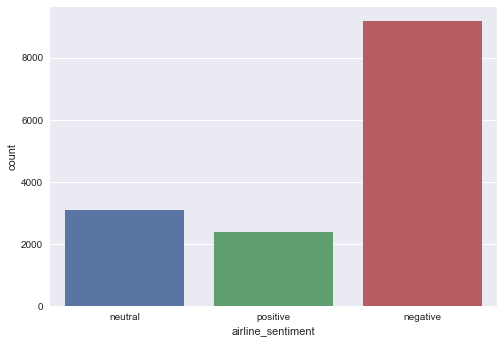

In [29]:
# Create a bar plot for each unique value of col - airline_sentiment
sns.countplot( x='airline_sentiment', data = Airline_Tweets )

C:\Users\anparash\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


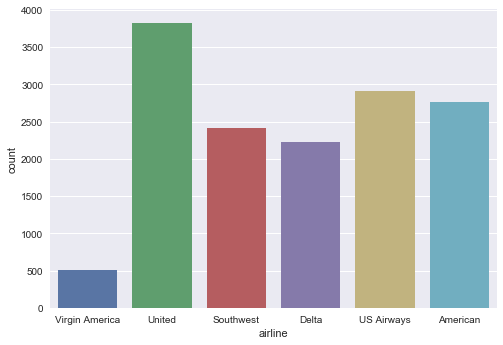

In [30]:
# Create a bar plot for each unique value of col that contains airline name 
sns.countplot( x='airline', data = Airline_Tweets )

For each airline count of comments for each category 

C:\Users\anparash\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


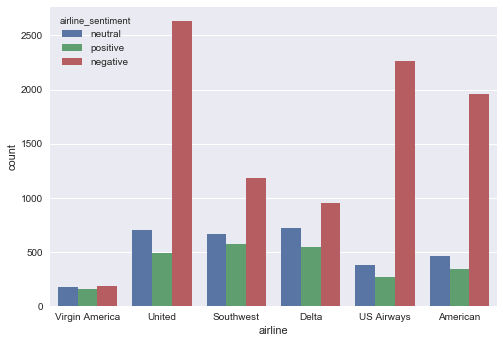

In [31]:
sns.countplot( x='airline',  hue = 'airline_sentiment', data = Airline_Tweets )

C:\Users\anparash\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


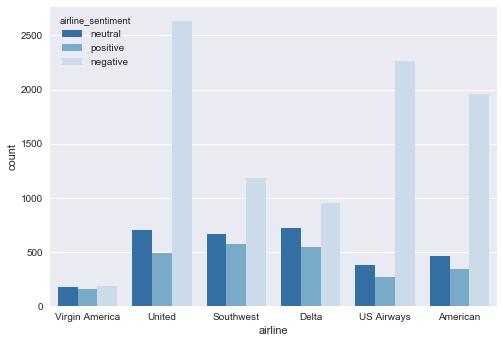

In [34]:
#sns.countplot( x='airline',  hue = 'airline_sentiment', data = Airline_Tweets , color= 'red')
#sns.countplot( x='airline',  hue = 'airline_sentiment', data = Airline_Tweets , palette= 'Reds_d')
sns.countplot( x='airline',   hue = 'airline_sentiment', data = Airline_Tweets , palette= 'Blues_r')

#WordCloud - I want to select all the tweet of negative sentiment and want to know which is the most common word 

In [35]:
neg_phrases = Airline_Tweets[ Airline_Tweets.airline_sentiment == 'negative']

In [37]:
neg_phrases.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


In [36]:
neg_words = []
for t in neg_phrases.text:  # Go to the "text" column of "neg_phrases" dataframe
    neg_words.append(t)
neg_words[:4]

['@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@VirginAmerica and it's a really big bad thing about it",
 "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
 '@VirginAmerica SFO-PDX schedule is still MIA.']

In [38]:
neg_text = pd.Series(neg_words).str.cat(sep = ' ')

In [39]:
neg_text[:50]

"@VirginAmerica it's really aggressive to blast obn"

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [47]:
wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200).generate(neg_text)

(-0.5, 1599.5, 799.5, -0.5)

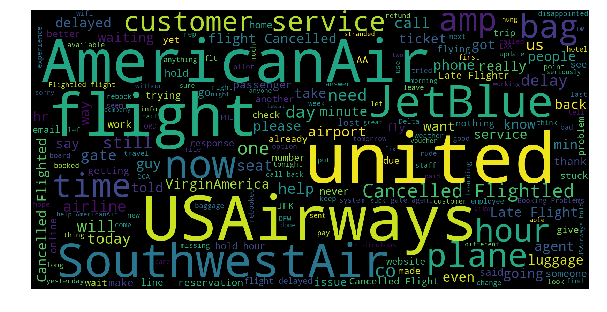

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

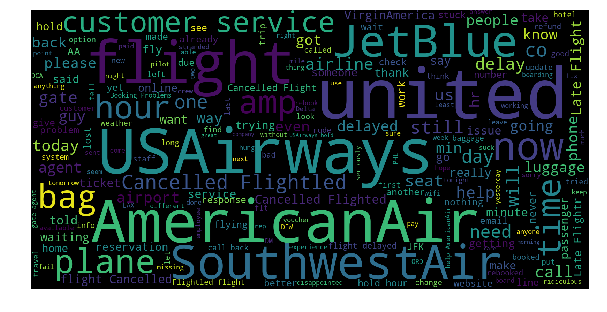

In [51]:
# Stopword - Most commonly used word are stopword 
from wordcloud import STOPWORDS
stop_words = list(STOPWORDS)

wordcloud = WordCloud( stopwords = stop_words, width = 1600, height = 800, max_font_size = 200).generate(neg_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

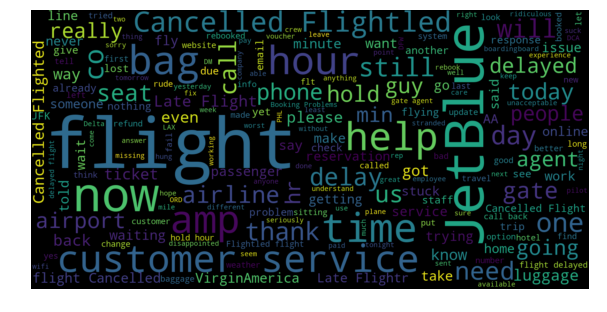

In [54]:
# Stopword - Most commonly used word are stopword 
# I want to update list ot stopwords
from wordcloud import STOPWORDS, ImageColorGenerator
stop_words = [ "USAirways", "plane", "united", "SouthwestAir", "AmericanAir"] + list(STOPWORDS)

wordcloud = WordCloud( stopwords = stop_words, width = 1600, height = 800, max_font_size = 200).generate(neg_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

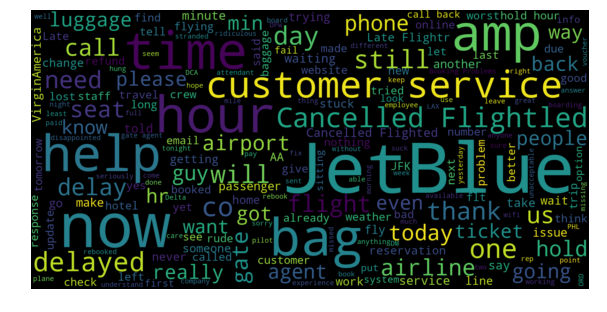

In [55]:
# Stopword - Most commonly used word are stopword 
# I want to update list ot stopwords
from wordcloud import STOPWORDS, ImageColorGenerator
stop_words = [ "USAirways", "plane", "united", "SouthwestAir", "AmericanAir", "flight"] + list(STOPWORDS)

wordcloud = WordCloud( stopwords = stop_words, width = 1600, height = 800, max_font_size = 200).generate(neg_text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Let's divide date into features and label set

In [56]:
Airline_Tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [57]:
X = Airline_Tweets.iloc[ :, 10].values
y = Airline_Tweets.iloc[ :,  1].values

In [60]:
print(X.shape)
print(y.shape)

(14640,)
(14640,)


In [ ]:
# @A@!!! great show 
#  A    grreat show 


In [64]:
# Cleaning of the text with the help of Regular Expression 
processed_tweets = [ ] # Defining an empty list 

# I want to run a loop from begining to the number of rows in entire dataframe
for tweet in range ( 0, len(X)):  # "tweet here is a couter, instead of "tweet" i or t
    # Remove all the special characters 
    processed_tweets = re.sub(r'\W', ' ', (X[tweet]))
    
    # Remove all single characters 
    processed_tweets = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweets)
    
    #Replace multiple spaces with single space 
    processed_tweets = re.sub(r'\s+', ' ', processed_tweets)
    
    #Convert everything into lower cases 
    processed_tweets = processed_tweets.lower()
    
    processed_tweets.append(processed_tweets)


AttributeError: 'str' object has no attribute 'append'

In [66]:
processed_tweets = []
 
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

from the processed tweets lets create a tf-idf matrix 


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
tfidfconvertor = TfidfVectorizer(max_features=5000, min_df = 5, max_df = .7, stop_words= stopwords.words('english'))

# min_df = word should be present in atleast 5 documents 
# max_df = word must not occur in more than 70 percent of document ?

In [69]:
X = tfidfconvertor.fit_transform(processed_tweets).toarray()

C:\Users\anparash\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [ ]:
# In X now we have tf-idf values for the text corpus 
# X is ready to be used in ML module 
# and we also have "y" which is our label 
